# Plot MPMS data (AC susceptibility)

This notebook visualizes data from low-temperature AC susceptibility experiments conducted on an MPMS instrument and exported to MagIC format.

- AC field: $H(t)=H_0\cos\omega t$ → sample response: $M(t)=M_0\cos(\omega t-\delta)$  
- In-phase susceptibility: $\chi'=\frac{M_0\cos\delta}{H_0}$ from `susc_chi_mass`  
- Out-of-phase susceptibility: $\chi''=\frac{M_0\sin\delta}{H_0}$ from `susc_chi_qdr_mass`

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [1]:
import pmagpy.rockmag as rmag
import pmagpy.contribution_builder as cb
import pmagpy.ipmag as ipmag
import pandas as pd
pd.set_option('display.max_columns', 500)
%config InlineBackend.figure_format = 'retina'

from bokeh.io import output_notebook, save
output_notebook(hide_banner=True)

## Import data

We take the approach described in the `rockmag_data_unpack.ipynb` notebook to bring MagIC data from a private workspace into the notebook as a Contribution. 

In [2]:
#define these three parameters to match your data
magic_id = '20100'
share_key = '1068543b-13d5-4b7b-9069-cc35de784e38'
dir_path = 'example_data/SSRM2022C'

result, magic_file = ipmag.download_magic_from_id(magic_id, directory=dir_path, share_key=share_key)
ipmag.unpack_magic(magic_file, dir_path,print_progress=False)
contribution = cb.Contribution(dir_path)
measurements = contribution.tables['measurements'].df

Download successful. File saved to: example_data/SSRM2022C/magic_contribution_20100.txt
1  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/MPMS_notebooks/example_data/SSRM2022C/contribution.txt
6  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/MPMS_notebooks/example_data/SSRM2022C/locations.txt
6  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/MPMS_notebooks/example_data/SSRM2022C/sites.txt
28  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/MPMS_notebooks/example_data/SSRM2022C/samples.txt
47  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/MPMS_notebooks/example_data/SSRM2022C/specimens.txt
140501  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/MPMS_notebooks/example_data/SSRM2022C/measurements.txt
-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


## The project export contains data from all the experiments

Each measurement in a MagIC measurements table has a `method_codes` value. These method codes come from a "controlled vocabulary" (https://www2.earthref.org/MagIC/method-codes). 

In the method codes used for the example contribution:
- `LP` refers to lab protocol
- `LP-X:LP-X-T:LP-X-F` refers to susceptibility vs. temperature and frequency experiments done on the MPMS

In [3]:
measurements.method_codes.unique()

array(['LP-X:LP-X-T:LP-X-F', 'LP-X:LP-X-T:LP-X-F:LP-X-H', 'LP-X-T',
       'LP-HYS', 'LP-BCR-BF', 'LP-FORC', 'LP-FC', 'LP-ZFC',
       'LP-CW-SIRM:LP-MC', 'LP-CW-SIRM:LP-MW', 'LP-DIR-AF', 'LP-AN-ARM',
       'LP-ARM-AFD'], dtype=object)

## Filter for the MPMS AC X-T data

Note that the `.dropna(axis=1, how='all').reset_index(drop=1)` code is used to remove columns that are all NaNs (i.e. data fields that are not relevant to the data in this experiment) and reset the index.


In [4]:
XT_measurements = measurements[measurements['method_codes'].str.contains('LP-X:LP-X-T:LP-X-F')].dropna(axis=1, how='all').reset_index(drop=1)
XT_measurements.head()

,experiment,instrument_codes,meas_field_ac,meas_freq,meas_temp,measurement,method_codes,quality,sequence,specimen,standard,susc_chi_mass,susc_chi_qdr_mass,timestamp
0,IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667,IRM-MPMS3,0.0003,1.00,10.0,DA4-r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667-1,LP-X:LP-X-T:LP-X-F,g,1.0,DA4-r,u,6.321000e-07,1.348000e-09,2024:05:29:09:35:19.00
1,IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667,IRM-MPMS3,0.0003,5.32,10.0,DA4-r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667-2,LP-X:LP-X-T:LP-X-F,g,2.0,DA4-r,u,6.296000e-07,1.504000e-09,2024:05:29:09:35:19.00
2,IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667,IRM-MPMS3,0.0003,28.26,10.0,DA4-r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667-3,LP-X:LP-X-T:LP-X-F,g,3.0,DA4-r,u,6.317000e-07,9.637000e-10,2024:05:29:09:35:19.00
3,IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667,IRM-MPMS3,0.0003,150.47,10.0,DA4-r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667-4,LP-X:LP-X-T:LP-X-F,g,4.0,DA4-r,u,6.297000e-07,1.548000e-09,2024:05:29:09:35:19.00
4,IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667,IRM-MPMS3,0.0003,800.46,10.0,DA4-r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667-5,LP-X:LP-X-T:LP-X-F,g,5.0,DA4-r,u,6.397000e-07,-5.734000e-09,2024:05:29:09:35:19.00


## Select a specimen and the X-T experiment of interest

- One could do multiple rounds of X-T experiments on the same specimen
- so choose in the `first dropdown menu` the specimen of interest
- the choose in the `second dropdown menu` the experiment of interest

In [5]:
specimen, experiment = rmag.interactive_specimen_experiment_selection(XT_measurements)

Dropdown(description='specimen:', options=('DA4-r', 'DX1-4r', 'DX1-5r'), value='DA4-r')

Dropdown(description='Experiment:', options=('IRM-MPMS3-LP-X:LP-X-T:LP-X-F-14667',), value='IRM-MPMS3-LP-X:LP-…

In [6]:
selected_experiment = XT_measurements[(XT_measurements['specimen']==specimen.value) & 
                                      (XT_measurements['experiment']==experiment.value)].reset_index(drop=1)

### plot in-phase X-T data

In [7]:
rmag.plot_mpms_ac(selected_experiment, phase='in', interactive=True)

### plot out-of-phase X-T data

In [8]:
rmag.plot_mpms_ac(selected_experiment, phase='out', interactive=True)

### plot in and out-of-phase X-T data together

In [9]:
rmag.plot_mpms_ac(selected_experiment, phase='both', interactive=True)

## Save the plot

Rather than generating an interactive plot, we can generate a static matplotlib plot.

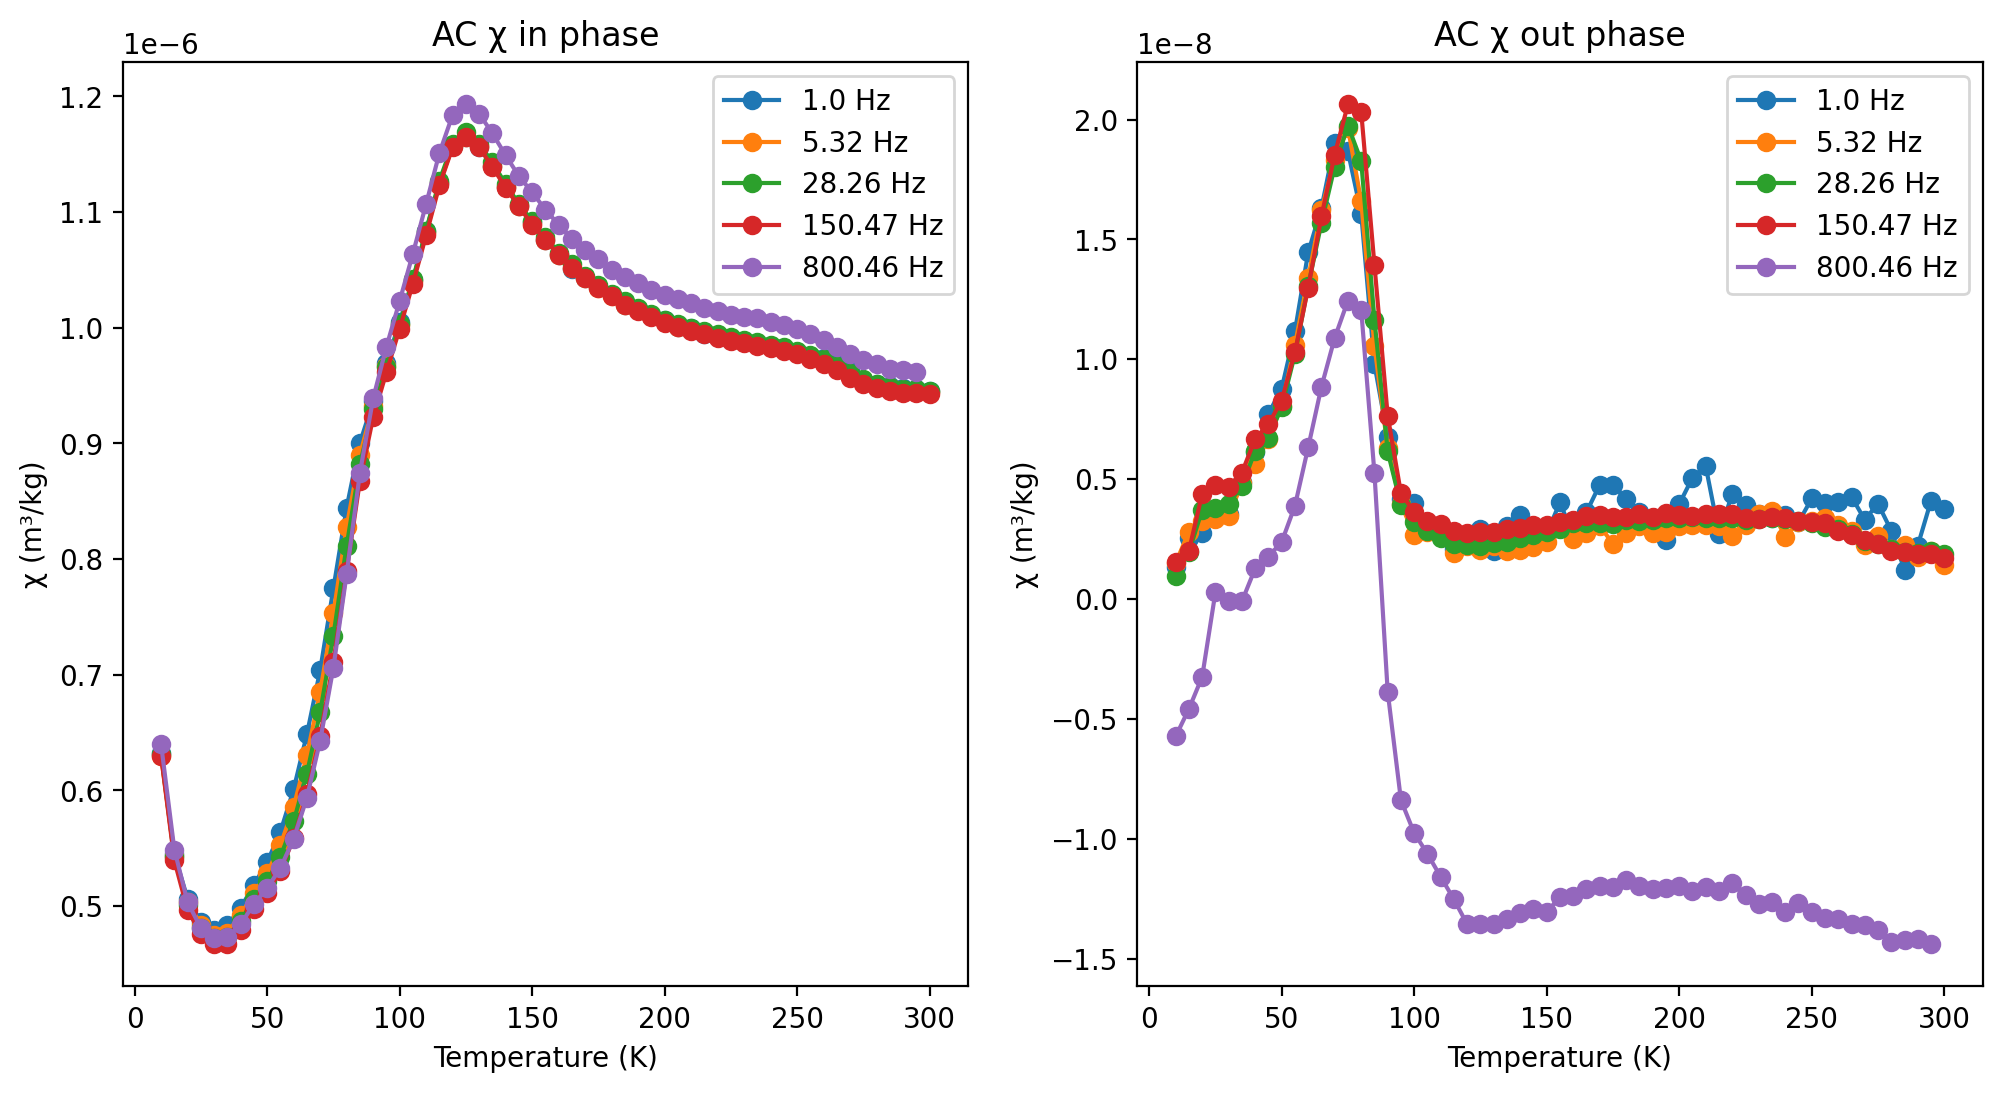

In [10]:
fig, ax = rmag.plot_mpms_ac(selected_experiment, phase='both', figsize=(12,6), return_figure=True)

To save the plot, put the name of the file in the cell below. There are many available file formats for figures such as: `jpg`, `pdf`, `png`. Whatever you choose in the file name will be the file type.

Set the `save_directory`. If you want it to be the folder that the notebook is in, set it to be `'.'`.

In [11]:
file_name = 'MPMS_ac_data.png'
save_directory = './example_data/SSRM2022C' 

file_path = save_directory + '/' + file_name
fig.savefig(file_path, dpi=300)